# Animations in EinsteinPy
### Import the required modules

In [1]:
import astropy.units as u
import numpy as np

from einsteinpy.coordinates import SphericalDifferential
from einsteinpy.geodesic import TimelikeGeodesic
from einsteinpy.metric import Schwarzschild
from einsteinpy.plotting import StaticGeodesicPlotter

### Defining various parameters
  - Mass of the gravitating body (M)
  - Initial state of the test partcle

In [2]:
# Metric Parameters and Initial Conditions
M = 6e24 * u.kg  # Mass

# Defining the initial coordinates of the test particle
# in SI
sph = SphericalDifferential(
    t=10.0 * u.s,  # Coordinate Time (has no effect in this case - Schwarzschild)
    r=130. * u.m,
    theta=np.pi / 2 * u.rad,
    phi=-np.pi / 8 * u.rad, # phi-Coordinate (has no effect in this case - Schwarzschild)
    v_r=0.0 * u.m / u.s,
    v_th=0.0 * u.rad / u.s,
    v_p=1900. * u.rad / u.s,
)

# Schwarzschild Metric Object
ms = Schwarzschild(coords=sph, M=M)

# Calculating Geodesic
geod = TimelikeGeodesic(metric=ms, coords=sph, end_lambda=0.002, step_size=5e-8)
geod

Geodesic Object:
            Type = (Time-like)
            Metric = ((
            Name: (Schwarzschild Metric),
            Coordinates: (Spherical Polar Coordinates: 
            t = (10.0 s), r = (130.0 m), theta = (1.5707963267948966 rad), phi = (-0.39269908169872414 rad)
            v_t: 1.0000346157679914 m / s, v_r: 0.0 m / s, v_th: 0.0 rad / s, v_p: 1900.0 rad / s),
            Mass: (6e+24 kg),
            Spin parameter: (0.0),
            Charge: (0.0 C),
            Schwarzschild Radius: (0.008911392322942397)
)),
            Initial State = ([ 2.99792458e+09  1.30000000e+02  1.57079633e+00 -3.92699082e-01
  1.00003462e+00  0.00000000e+00  0.00000000e+00  1.90000000e+03]),
            Trajectory = ([[ 2.99792458e+09  1.20104339e+02 -4.97488462e+01 ...  9.45228078e+04
   2.28198245e+05  0.00000000e+00]
 [ 2.99792458e+09  1.20108103e+02 -4.97397110e+01 ...  9.36471118e+04
   2.28560931e+05 -5.80379473e-14]
 [ 2.99792458e+09  1.20143810e+02 -4.96475618e+01 ...  8.48885265e+04

### Animating

<IPython.core.display.Javascript object>


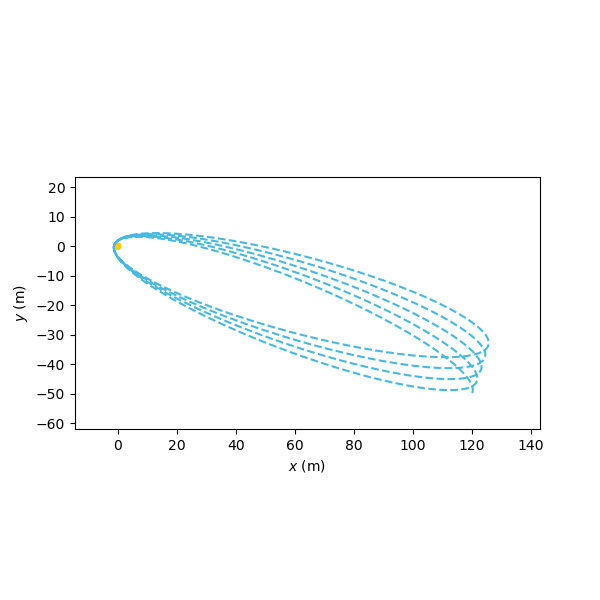

In [3]:
%matplotlib notebook
obj = StaticGeodesicPlotter()
obj.animate(geod, interval=25)
obj.show()